<a href="https://colab.research.google.com/github/hadi-yazdi/hadi-yazdi.github.io/blob/master/historical_buildings_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import files
train_zipfile = files.upload()

Saving train-historical-buildings.zip to train-historical-buildings.zip
Saving validation-historical-buildings.zip to validation-historical-buildings.zip


In [7]:
import os
import zipfile

local_zip = '/content/train-historical-buildings.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/train-historical-buildings')
local_zip = '/content/validation-historical-buildings.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/validation-historical-buildings')
zip_ref.close()

# **Visualazing the photos**

In [9]:
train_historical_dir = os.path.join('/content/train-historical-buildings/historical')

train_not_historical_dir = os.path.join('/content/train-historical-buildings/not-historical')

validation_historical_dir = os.path.join('/content/validation-historical-buildings/historical')

validation_not_historical_dir = os.path.join('/content/validation-historical-buildings/not-historical')

In [10]:
train_historical_names = os.listdir(train_historical_dir)
print(train_historical_names[:15])

train_not_historical_names = os.listdir(train_not_historical_dir)
print(train_not_historical_names[:15])

validation_historical_hames = os.listdir(validation_historical_dir)
print(validation_historical_hames[:10])

validation_not_historical_names = os.listdir(validation_not_historical_dir)
print(validation_not_historical_names[:10])

['4-5.JPG', '4-3.JPG', '1-102.JPG', '1-124.JPG', '1-1.JPG', '3-42.JPG', '1-153.JPG', '1-106.JPG', '2-97.JPG', '1-152.JPG', '2-31.JPG', '3-4.JPG', '1-118.JPG', '4-40.JPG', '1-173.JPG']
['10-51.JPG', '10-72.JPG', '14-49.JPG', '14-10.JPG', '8-72.JPG', '8-1.JPG', '13-31.JPG', '7-33.JPG', '7-56.JPG', '9-43.JPG', '14-80.JPG', '13-22.JPG', '9-61.JPG', '8-74.JPG', '13-69.JPG']
['2-45.JPG', '1-197.JPG', '1-96.JPG', '2-44.JPG', '3-48.JPG', '4-68.JPG', '1-180.JPG', '1-61.JPG', '2-94.JPG', '1-112.JPG']
['10-23.JPG', '9-1.JPG', '8-48.JPG', '14-34.JPG', '14-67.JPG', '8-13.JPG', '10-76.JPG', '7-27.JPG', '13-46.JPG', '7-26.JPG']


In [11]:
print('total training historical images:', len(os.listdir(train_historical_dir)))
print('total training not historical images:', len(os.listdir(train_not_historical_dir)))
print('total validation historical images:', len(os.listdir(validation_historical_dir)))
print('total validation not historical images:', len(os.listdir(validation_not_historical_dir)))

total training historical images: 384
total training not historical images: 384
total validation historical images: 96
total validation not historical images: 96


In [12]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

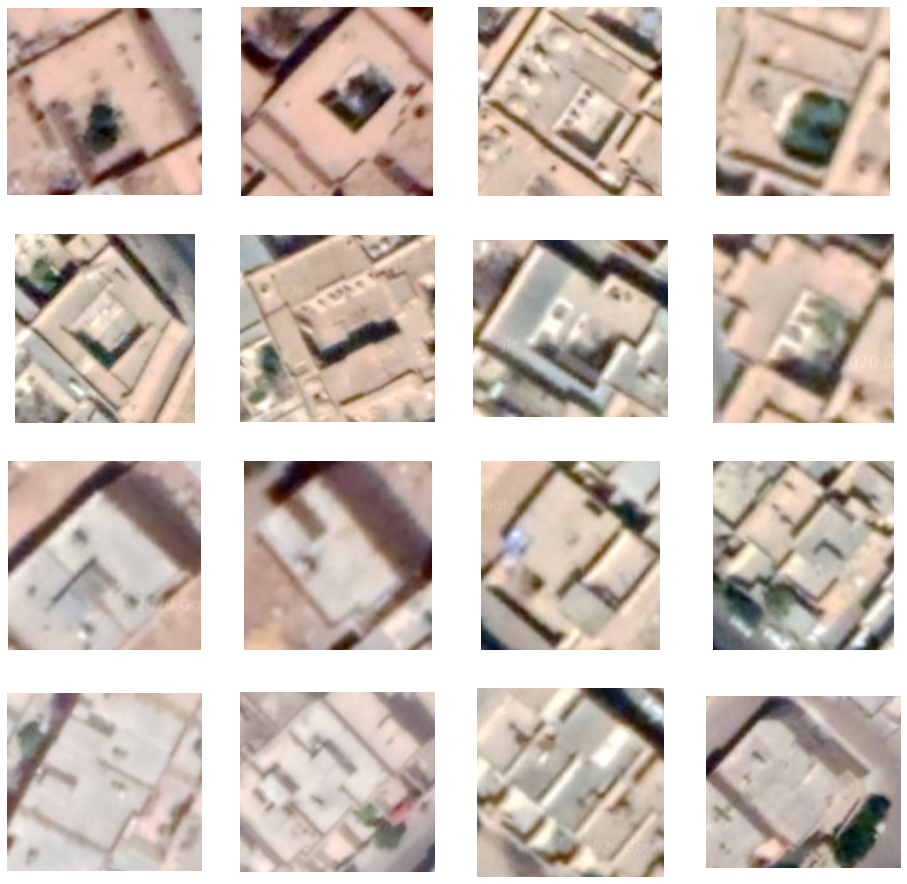

In [13]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_historical_pix = [os.path.join(train_historical_dir, fname) 
                for fname in train_historical_names[pic_index-8:pic_index]]
next_not_historical_pix = [os.path.join(train_not_historical_dir, fname) 
                for fname in train_not_historical_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_historical_pix+next_not_historical_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


# **Building the DNN Model**

In [14]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [16]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

# Data Preprocessing

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/train-historical-buildings/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/content/validation-historical-buildings/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 768 images belonging to 2 classes.
Found 192 images belonging to 2 classes.


# Training

In [18]:
history = model.fit(
      train_generator,
      steps_per_epoch=6,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=6)

Epoch 1/15
6/6 [==============================] - 4s 712ms/step - loss: 0.8181 - accuracy: 0.4987 - val_loss: 0.6898 - val_accuracy: 0.5000
Epoch 2/15
6/6 [==============================] - 4s 729ms/step - loss: 0.7012 - accuracy: 0.5768 - val_loss: 0.8087 - val_accuracy: 0.5000
Epoch 3/15
6/6 [==============================] - 4s 736ms/step - loss: 1.0994 - accuracy: 0.5586 - val_loss: 0.6440 - val_accuracy: 0.7240
Epoch 4/15
6/6 [==============================] - 4s 735ms/step - loss: 0.7081 - accuracy: 0.6862 - val_loss: 0.6637 - val_accuracy: 0.5260
Epoch 5/15
6/6 [==============================] - 4s 735ms/step - loss: 0.4650 - accuracy: 0.7773 - val_loss: 0.2976 - val_accuracy: 0.8698
Epoch 6/15
6/6 [==============================] - 4s 728ms/step - loss: 0.4692 - accuracy: 0.7969 - val_loss: 0.3954 - val_accuracy: 0.8750
Epoch 7/15
6/6 [==============================] - 4s 736ms/step - loss: 0.3425 - accuracy: 0.8880 - val_loss: 0.2569 - val_accuracy: 0.9010
Epoch 8/15
6/6 [====

# Running the Model

In [19]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is not a historical building")
  else:
    print(fn + " is a historical building")

Saving h1.JPG to h1.JPG
Saving h2.JPG to h2.JPG
Saving h3.JPG to h3.JPG
Saving h4.JPG to h4.JPG
Saving h5.JPG to h5.JPG
Saving h6.JPG to h6.JPG
Saving h7.JPG to h7.JPG
Saving h8.JPG to h8.JPG
Saving h9.JPG to h9.JPG
Saving h10.JPG to h10.JPG
Saving h11.JPG to h11.JPG
Saving h12.JPG to h12.JPG
Saving h13.JPG to h13.JPG
Saving h14.JPG to h14.JPG
Saving h15.JPG to h15.JPG
Saving h16.JPG to h16.JPG
Saving h17.JPG to h17.JPG
Saving n1.JPG to n1.JPG
Saving n2.JPG to n2.JPG
Saving n3.JPG to n3.JPG
Saving n4.JPG to n4.JPG
Saving n5.JPG to n5.JPG
Saving n6.JPG to n6.JPG
Saving n7.JPG to n7.JPG
Saving n8.JPG to n8.JPG
Saving n9.JPG to n9.JPG
Saving n10.JPG to n10.JPG
Saving n11.JPG to n11.JPG
Saving n12.JPG to n12.JPG
Saving n13.JPG to n13.JPG
Saving n14.JPG to n14.JPG
Saving n15.JPG to n15.JPG
Saving n16.JPG to n16.JPG
Saving n17.JPG to n17.JPG
[0.]
h1.JPG is a historical building
[0.]
h2.JPG is a historical building
[2.5454627e-27]
h3.JPG is a historical building
[0.]
h4.JPG is a historical bu

# Visualizing Intermediate Representations

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


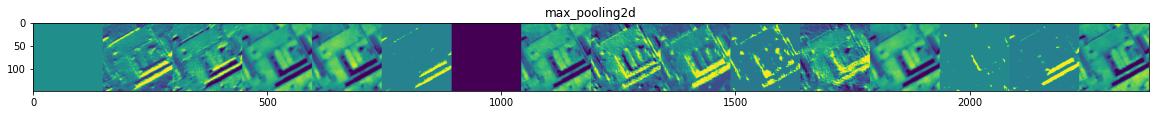

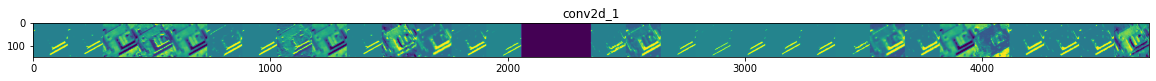

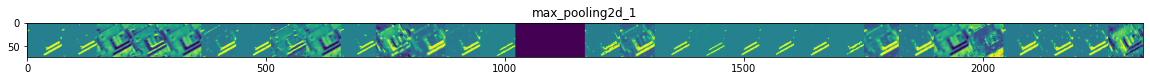

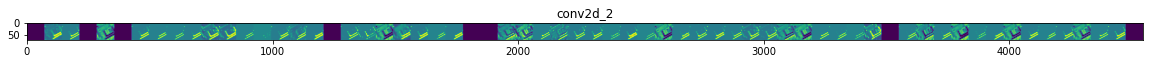

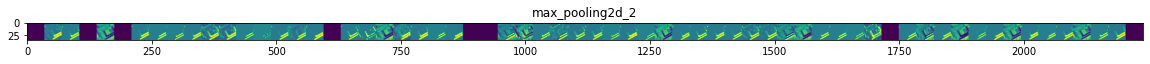

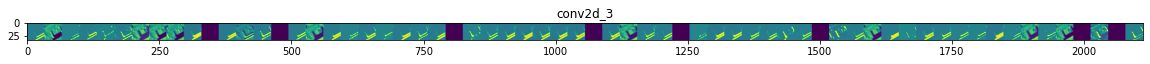

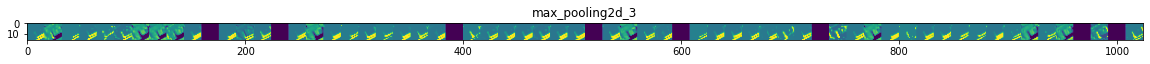

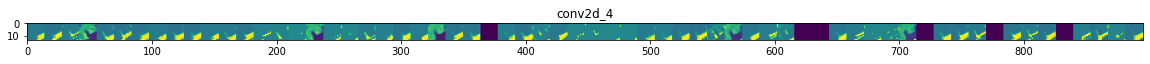

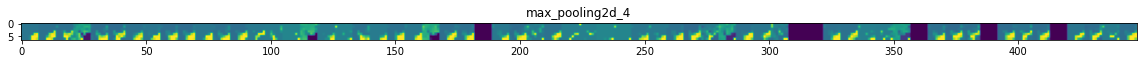

In [20]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
historical_img_files = [os.path.join(train_historical_dir, f) for f in train_historical_names]
not_historical_img_files = [os.path.join(train_not_historical_dir, f) for f in train_not_historical_names]
img_path = random.choice(historical_img_files + not_historical_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [ ]:
from google.colab import files
!rm -rf train-historical-buildings.zip
!rm -rf validation-historical-buildings.zip
!rm -rf train-historical-buildings
!rm -rf validation-historical-buildings